# **PageRank**

## PageRank Data Pak Mul

In [ ]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 0)])

pr = nx.pagerank(G, alpha=0.85)
print(pr)

{0: 0.387789442707259, 1: 0.21481051315058508, 2: 0.3974000441421556}


In [ ]:
import numpy as np

def pagerank(adj_matrix, d=0.85, max_iter=100, tol=1e-6):
    """
    Hitung PageRank dari matriks adjacency.

    Parameters:
        adj_matrix : array-like, shape (n, n)
            Matriks adjacency (1 jika ada link i -> j)
        d : float
            Damping factor (default: 0.85)
        max_iter : int
            Maksimum iterasi
        tol : float
            Toleransi konvergensi

    Returns:
        r : ndarray, shape (n,)
            Vektor PageRank
    """
    adj = np.array(adj_matrix, dtype=float)
    n = adj.shape[0]

    # Tangani dangling nodes (baris dengan jumlah 0)
    out_degree = np.sum(adj, axis=1)
    for i in range(n):
        if out_degree[i] == 0:
            adj[i, :] = 1.0  # taut ke semua halaman

    # Normalisasi baris → jadi matriks transisi (baris jumlah = 1)
    # TAPI: PageRank asli menggunakan TRANSPOSE → aliran masuk
    # Jadi kita transpos untuk membuat kolom = out-link
    M = adj / np.sum(adj, axis=1, keepdims=True)
    M = M.T  # Sekarang M[j,i] = probabilitas dari i ke j

    # Inisialisasi
    r = np.ones(n) / n
    teleport = (1 - d) / n

    for _ in range(max_iter):
        r_new = d * M @ r + teleport
        if np.linalg.norm(r_new - r, 1) < tol:
            break
        r = r_new

    return r

# Contoh penggunaan
if __name__ == "__main__":
    # Graf: 0 → 1, 0 → 2, 1 → 2, 2 → 0
    A = [
        [0, 1, 1],  # 0 links to 1 and 2
        [0, 0, 1],  # 1 links to 2
        [1, 0, 0],  # 2 links to 0
    ]

    pr = pagerank(A)
    print("PageRank:")
    for i, score in enumerate(pr):
        print(f"Node {i}: {score:.4f}")

PageRank:
Node 0: 0.3878
Node 1: 0.2148
Node 2: 0.3974


## PageRank data Pak Mul

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt # (Opsional, jika ingin menampilkan)

file_name = 'web-Google_10k.txt'

try:
    # Langsung membaca file edgelist dari hard drive
    # Dataset 'web-Google_10k.txt' biasanya memiliki komentar di awal
    # dan nodenya adalah angka (integer)
    G = nx.read_edgelist(
        file_name,
        comments='#',           # Abaikan baris yang dimulai dengan '#'
        create_using=nx.DiGraph(), # Gunakan DiGraph jika grafiknya berarah
        nodetype=int            # Baca node sebagai angka
    )

    print(f"Berhasil membaca file: {file_name}")
    print("--- Info Graf ---")
    print(f"Jumlah node: {G.number_of_nodes()}")
    print(f"Jumlah edge: {G.number_of_edges()}")

    # (Opsional) Tampilkan sebagian kecil dari graph
    # G_subset = G.subgraph(list(G.nodes())[:50]) # Ambil 50 node pertama
    # nx.draw(G_subset, with_labels=True, node_size=50)
    # plt.show()

except FileNotFoundError:
    print(f"--- ERROR ---")
    print(f"File '{file_name}' tidak ditemukan.")
    print("Pastikan file tersebut berada di folder yang sama dengan script Python Anda.")
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")

Berhasil membaca file: web-Google_10k.txt
--- Info Graf ---
Jumlah node: 10000
Jumlah edge: 78323


In [ ]:
# 1️⃣ Baca file (lewati baris komentar)
edges = pd.read_csv(
    "web-Google_10k.txt",
    sep="\t",
    comment="#",
    names=["FromNodeId", "ToNodeId"]
)

print("Jumlah edges:", len(edges))

Jumlah edges: 78323


In [ ]:
# 3️⃣ Hitung PageRank
pagerank = nx.pagerank(G, alpha=0.85)
pagerank_df = pd.DataFrame(list(pagerank.items()), columns=["Node", "PageRank"]).sort_values("PageRank", ascending=False)

In [ ]:
# 4️⃣ Tampilkan 5 PageRank tertinggi
print("\nTop 5 PageRank tertinggi:")
print(pagerank_df.head(5))


Top 5 PageRank tertinggi:
        Node  PageRank
994   486980  0.006515
3849  285814  0.004633
113   226374  0.003301
2847  163075  0.003288
5214  555924  0.002756


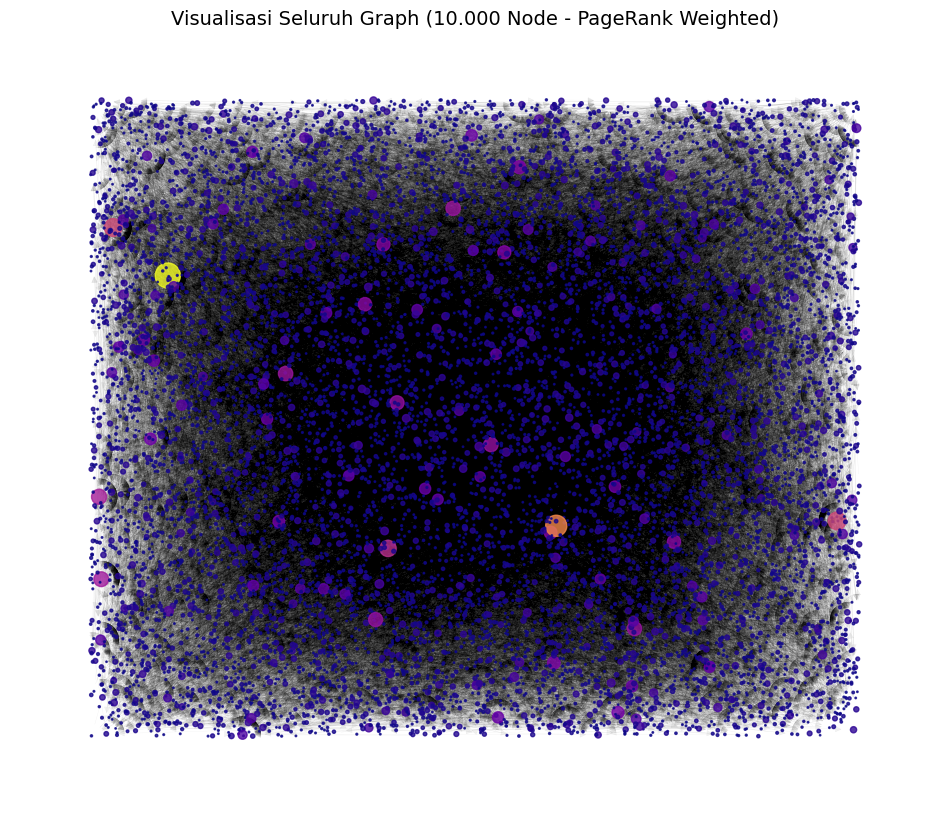

In [ ]:
# 5️⃣ Visualisasi seluruh graph (optimasi agar tidak berat)
plt.figure(figsize=(12, 10))

# Gunakan layout ringan agar cepat
pos = nx.random_layout(G)

# Warna node bisa disesuaikan dengan nilai PageRank
node_colors = [pagerank[n] for n in G.nodes()]

# Ukuran node proporsional dengan nilai PageRank
node_sizes = [v * 50000 for v in pagerank.values()]  # skala disesuaikan

# Gambar seluruh node dan edge
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.05, width=0.3)

plt.title("Visualisasi Seluruh Graph (10.000 Node - PageRank Weighted)", fontsize=14)
plt.axis("off")
plt.show()

## PageRank menggunakan Data berita

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_name = 'preprocessing_crawling_berita.csv'

try:
    # 1. Baca file .csv menggunakan Pandas
    #    Kita gunakan header=None karena dari error sepertinya file Anda tidak punya
    #    baris header (judul kolom).
    #    Jika file Anda PUNYA header, hapus saja 'header=None'.
    df = pd.read_csv(file_name, header=None)

    # 2. Buat graf dari DataFrame Pandas.
    #    Kita asumsikan kolom pertama (indeks 0) adalah 'source'
    #    dan kolom kedua (indeks 1) adalah 'target'.
    G = nx.from_pandas_edgelist(
        df,
        source=0,                  # Gunakan kolom pertama (indeks 0) sebagai source
        target=1,                  # Gunakan kolom kedua (indeks 1) sebagai target
        create_using=nx.DiGraph()
    )

    print(f"Berhasil membaca file: {file_name}")
    print("--- Info Graf ---")
    print(f"Jumlah node: {G.number_of_nodes()}")
    print(f"Jumlah edge: {G.number_of_edges()}")

except FileNotFoundError:
    print(f"--- ERROR ---")
    print(f"File '{file_name}' tidak ditemukan.")
    print("Pastikan file tersebut berada di folder yang sama dengan script Anda.")
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")

Berhasil membaca file: preprocessing_crawling_berita.csv
--- Info Graf ---
Jumlah node: 1251
Jumlah edge: 626


In [ ]:
# 1️⃣ Baca file (lewati baris komentar)
edges = pd.read_csv(
    "preprocessing_crawling_berita.csv",
    sep="\t",
    comment="#",
    names=["FromNodeId", "ToNodeId"]
)

print("Jumlah edges:", len(edges))

Jumlah edges: 626


In [ ]:
# 2️⃣ Buat graph dari edges
G = nx.DiGraph()
G.add_edges_from(edges.values)

print(f"Jumlah node dalam graph: {G.number_of_nodes()}")
print(f"Jumlah edge dalam graph: {G.number_of_edges()}")

Jumlah node dalam graph: 1252
Jumlah edge dalam graph: 626


In [ ]:
# 3️⃣ Hitung PageRank
pagerank = nx.pagerank(G, alpha=0.85)
pagerank_df = pd.DataFrame(list(pagerank.items()), columns=["Node", "PageRank"]).sort_values("PageRank", ascending=False)

In [ ]:
# 4️⃣ Tampilkan 5 PageRank tertinggi
print("\nTop 5 PageRank tertinggi:")
print(pagerank_df.head(5))


Top 5 PageRank tertinggi:
     Node  PageRank
1251  NaN  0.001037
1249  NaN  0.001037
1233  NaN  0.001037
1231  NaN  0.001037
1229  NaN  0.001037


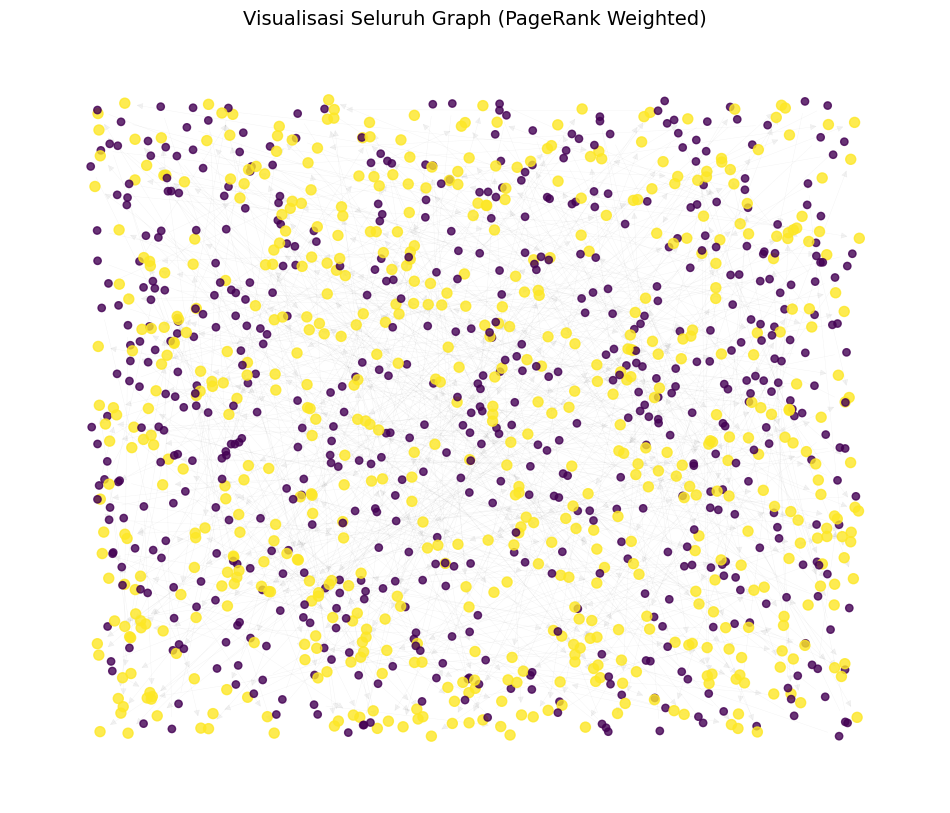

In [ ]:
# 5️⃣ Visualisasi seluruh graph (optimasi agar tidak berat)
plt.figure(figsize=(12, 10))

# Gunakan layout ringan agar cepat
pos = nx.random_layout(G)

# Warna node bisa disesuaikan dengan nilai PageRank
node_colors = [pagerank[n] for n in G.nodes()]

# Ukuran node proporsional dengan nilai PageRank
node_sizes = [v * 50000 for v in pagerank.values()]  # skala disesuaikan

# Gambar seluruh node dan edge
nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.viridis,  # <-- WARNA DIUBAH DI SINI
    alpha=0.8
)
nx.draw_networkx_edges(G, pos, alpha=0.05, width=0.3)

plt.title("Visualisasi Seluruh Graph (PageRank Weighted)", fontsize=14)
plt.axis("off")
plt.show()

# PageRank menggunakan link fakultas teknik

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd # Pastikan Anda sudah mengimpor pandas

# Tentukan nama file yang akan dibaca
file_name = 'semua_link_FT.csv'

try:
    # --- 1. Membaca file ---
    # Menggantikan 'uploaded = files.upload()'
    # Sekarang data Anda tersimpan di variabel 'df' (DataFrame)
    df = pd.read_csv(file_name)

    print(f"Berhasil membaca file: {file_name}")

    # (Opsional) Tampilkan 5 baris pertama untuk_
    # print("--- 5 Baris Pertama Data ---")
    # print(df.head())

except FileNotFoundError:
    print(f"--- ERROR ---")
    print(f"File '{file_name}' tidak ditemukan.")
    print("Pastikan file tersebut berada di folder yang sama dengan script Python Anda.")
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")

Berhasil membaca file: semua_link_FT.csv


In [ ]:
# 1️⃣ Baca file
edges = pd.read_csv(
    "semua_link_FT.csv"
)
print("Kolom yang ada:", list(edges.columns))

# Ambil hanya kolom yang dibutuhkan dan ganti nama kolom
edges = edges[['Page', 'Link Keluar']]
edges.columns = ["FromNodeId", "ToNodeId"]

print("Jumlah edges:", len(edges))

Kolom yang ada: ['No', 'Page', 'Link Keluar']
Jumlah edges: 5508


In [ ]:
# 2️⃣ Buat graph dari edges
G = nx.DiGraph()
G.add_edges_from(edges.values)

print(f"Jumlah node dalam graph: {G.number_of_nodes()}")
print(f"Jumlah edge dalam graph: {G.number_of_edges()}")

Jumlah node dalam graph: 241
Jumlah edge dalam graph: 2656


In [ ]:
# 3️⃣ Hitung PageRank
pagerank = nx.pagerank(G, alpha=0.85)
pagerank_df = pd.DataFrame(list(pagerank.items()), columns=["Node", "PageRank"]).sort_values("PageRank", ascending=False)

In [ ]:
# 4️⃣ Tampilkan 5 PageRank tertinggi
print("\nTop 5 PageRank tertinggi:")
print(pagerank_df.head(5))


Top 5 PageRank tertinggi:
                                            Node  PageRank
0                https://teknik.trunojoyo.ac.id/   0.00496
2       https://teknik.trunojoyo.ac.id/about-us/   0.00496
3        https://teknik.trunojoyo.ac.id/sekilas/   0.00496
4  https://teknik.trunojoyo.ac.id/about-us/#visi   0.00496
5  https://teknik.trunojoyo.ac.id/about-us/#ciri   0.00496


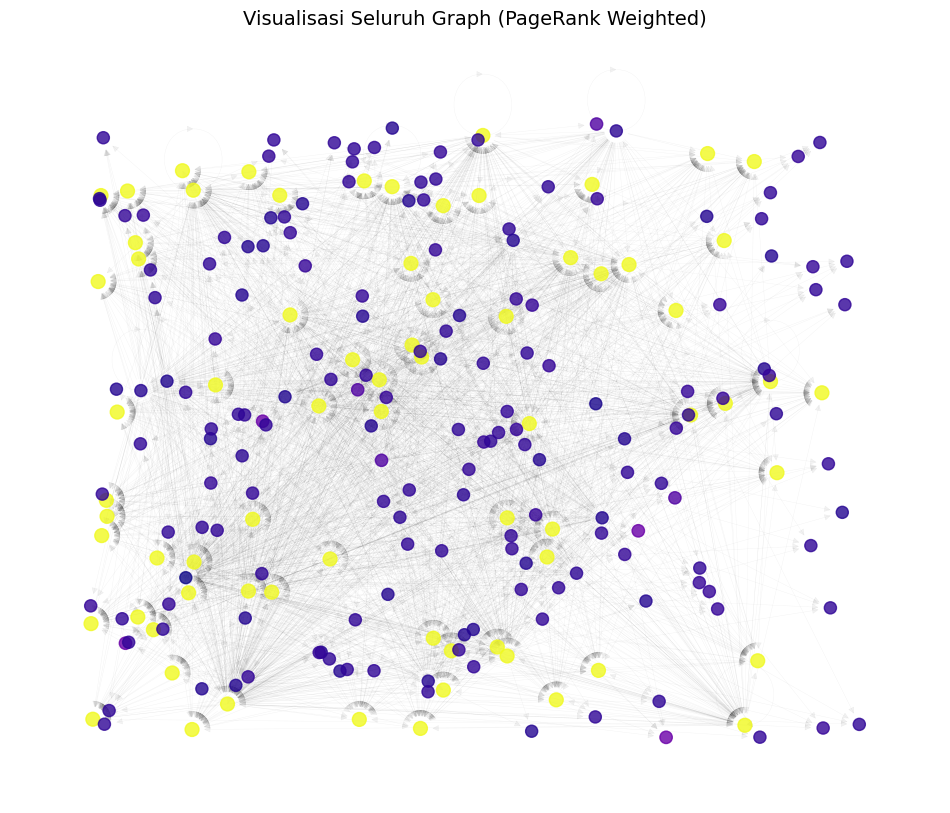

In [ ]:
# 5️⃣ Visualisasi seluruh graph (optimasi agar tidak berat)
plt.figure(figsize=(12, 10))

# Gunakan layout ringan agar cepat
pos = nx.random_layout(G)

# Warna node bisa disesuaikan dengan nilai PageRank
node_colors = [pagerank[n] for n in G.nodes()]

# Ukuran node proporsional dengan nilai PageRank
node_sizes = [v * 20000 for v in pagerank.values()]  # skala disesuaikan

# Gambar seluruh node dan edge
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.05, width=0.3)

plt.title("Visualisasi Seluruh Graph (PageRank Weighted)", fontsize=14)
plt.axis("off")
plt.show()